# Assignment 01

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Health Analytics
- Course ID: BDA700NAA.05841.2247
- Data source: https://data.ontario.ca/dataset/covid-19-assessment-centre-locations/resource/1b073d1d-f832-4015-8bc0-d3381e84a465

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
# load data
data = pd.read_json('https://www.ontario.ca/covid-19-ac-assets/data/locations.json')
# columns
print("Columns: \n", data.columns)
# first 5 observations
data.head()

Columns: 
 Index(['location_id', 'assessment_centre', 'location_name', 'operated_by',
       'city', 'address', 'postal_code', 'province', 'latitude', 'longitude',
       'phu', 'website', 'monday', 'wednesday', 'friday', 'saturday', 'sunday',
       'appointments', 'online_appointments', 'walk_ins', 'symptomatic',
       'drive_through', 'children_under_2', 'age_threshold', 'accessible',
       'public_transit', 'additional_information', 'additional_information_fr',
       'location_name_fr', 'address_fr', 'tuesday', 'thursday', 'phone',
       'french_language_services', 'asl_interpretation', 'weeks_pregnant',
       'free_parking', 'phone_appointments', 'general_population',
       'first_nations', 'email', 'testing_enrolled', 'community_lab',
       'pharmacy', 'vaccine_enrolled'],
      dtype='object')


,location_id,assessment_centre,location_name,operated_by,city,address,postal_code,province,latitude,longitude,...,weeks_pregnant,free_parking,phone_appointments,general_population,first_nations,email,testing_enrolled,community_lab,pharmacy,vaccine_enrolled
0,2,1.0,South Georgian Bay Regional Assessment Centre,Georgian Bay Family Health Team,Collingwood,490 Ontario Street,L9Y 1N6,ON,44.503928,-80.201516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34,1.0,Lakeridge Health - Ajax Pickering,k,Ajax,580 Harwood Avenue South,L1S 2J4,ON,43.836799,-79.017114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84,1.0,Santé Manitouwadge Health,Santé Manitouwadge Health,Manitouwadge,1 Health Care Crescent,P0T 2C0,ON,49.127701,-85.824681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89,1.0,Superior North EMS Community Paramedicine Program,Superior North EMS,Thunder Bay,1408 Brown Street,P7B 2M6,ON,48.365919,-89.281230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,112,1.0,Toronto Western Hospital,University Health Network,Toronto,347 Bathurst Street,M5T 2S7,ON,43.652594,-79.405856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   location_id                1981 non-null   int64  
 1   assessment_centre          345 non-null    float64
 2   location_name              1981 non-null   object 
 3   operated_by                396 non-null    object 
 4   city                       1981 non-null   object 
 5   address                    1977 non-null   object 
 6   postal_code                1979 non-null   object 
 7   province                   1981 non-null   object 
 8   latitude                   1979 non-null   float64
 9   longitude                  1979 non-null   float64
 10  phu                        1976 non-null   object 
 11  website                    1874 non-null   object 
 12  monday                     1861 non-null   object 
 13  wednesday                  1861 non-null   objec

In [27]:
data.describe()

,location_id,assessment_centre,latitude,longitude,appointments,walk_ins,symptomatic,drive_through,children_under_2,accessible,...,french_language_services,asl_interpretation,free_parking,phone_appointments,general_population,first_nations,testing_enrolled,community_lab,pharmacy,vaccine_enrolled
count,1981.000000,345.0,1979.000000,1979.000000,1936.0,86.0,866.0,55.0,170.0,169.0,...,64.0,17.0,146.0,1729.0,93.0,9.0,139.0,60.0,1574.0,648.0
mean,1724.548208,1.0,43.963690,-79.397793,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,3802.705065,0.0,1.807148,3.283538,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.0,0.000000,-94.499429,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,512.000000,1.0,43.501620,-79.898772,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1013.000000,1.0,43.733765,-79.484541,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1515.000000,1.0,44.176155,-79.220130,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,23470.000000,1.0,52.922613,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 1. Geographic Distribution & Accessibility:

### Distribution of Assessment Centres across Cities:

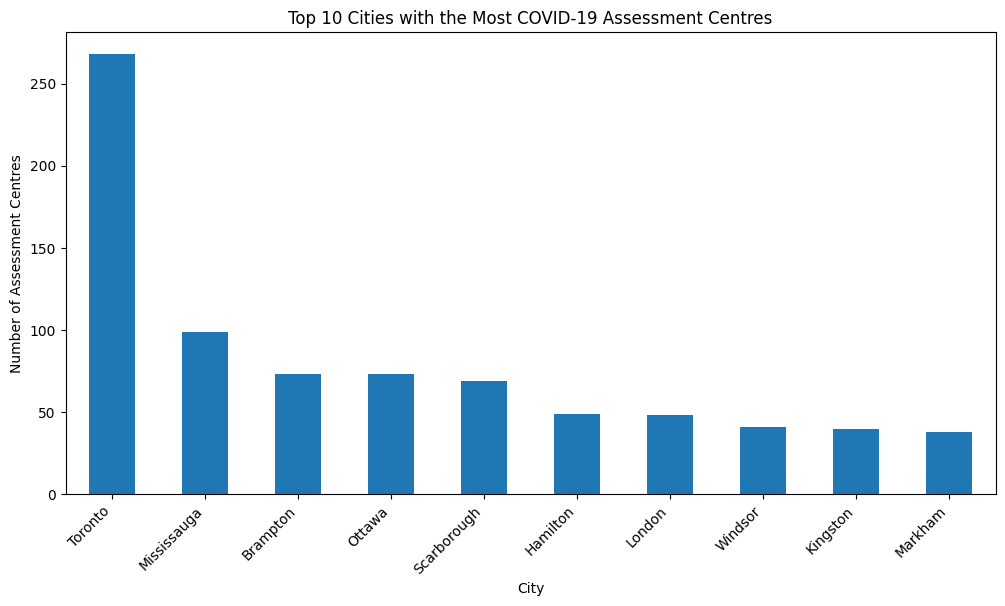

In [30]:
# Count the number of assessment centres in each city
city_counts = data['city'].value_counts()

# Plot the top 10 cities with the most assessment centres
plt.figure(figsize=(12, 6))
city_counts[:10].plot(kind='bar')
plt.title('Top 10 Cities with the Most COVID-19 Assessment Centres')
plt.xlabel('City')
plt.ylabel('Number of Assessment Centres')
plt.xticks(rotation=45, ha='right')
plt.show()

### Proportion of Assessment Centres with Key Accessibility Features:

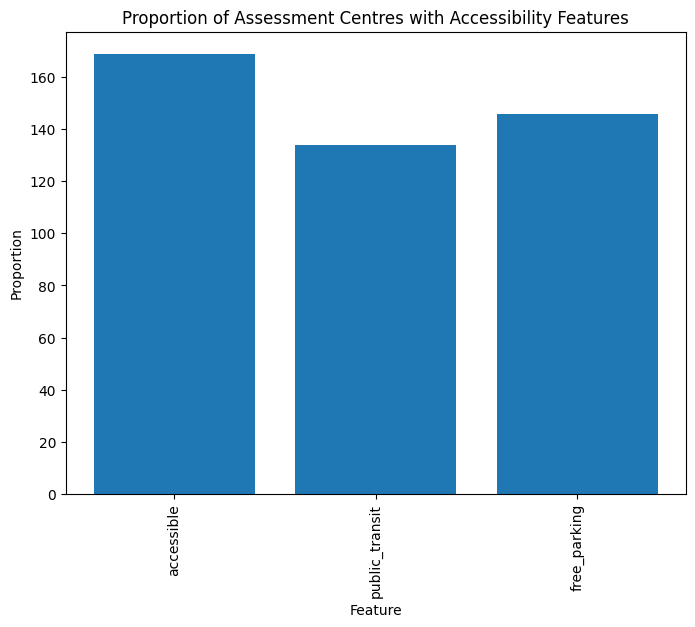

In [50]:
# Calculate the proportion of centres with each feature
accessibility_features = ['accessible', 'public_transit', 'free_parking']

feature_proportions = {}
for feature in accessibility_features:
    feature_proportions[feature] = data[feature].notna().sum()

# Plot the proportions
plt.figure(figsize=(8, 6))
plt.bar(feature_proportions.keys(), feature_proportions.values())
plt.title('Proportion of Assessment Centres with Accessibility Features')
plt.xlabel('Feature')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.show()

## 2. Operational Characteristics:

### a) Distribution of Operating Hours:

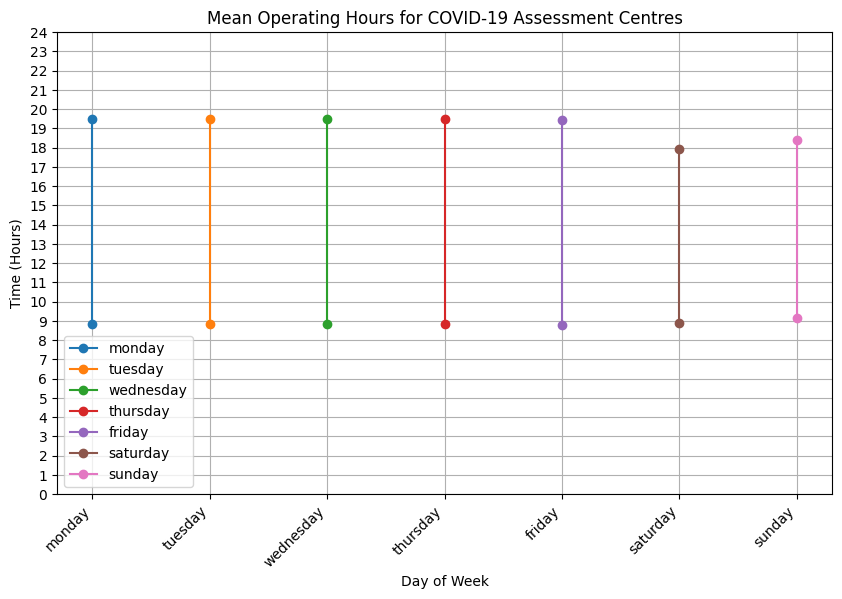

In [76]:
# function to extract operation start and end time
def extract_start_end_times(hours_string):
    """
    Extracts the start and end times from a string representing operating hours.
    Handles cases with multiple time ranges separated by '&'.
    """
    if pd.isna(hours_string):
        return None, None
    
    first_range = hours_string.split('&')[0] # Take only the first range
    times = first_range.split('-')
    
    if len(times) == 2:
        start_time = times[0].strip()
        end_time = times[1].strip()
        return start_time, end_time
    else:
        return None, None 

def time_to_minutes(time_str):
    """Converts a time string (HH:MM) to minutes since midnight."""
    if pd.isna(time_str):
        return None
    try:
        time = datetime.datetime.strptime(time_str, '%H:%M').time()
        return time.hour * 60 + time.minute
    except ValueError:  # Handle invalid time formats
        return None

def calculate_mean_times(day_column):
    """Calculates the mean start and end times for a given day's hours."""
    start_times_minutes = []
    end_times_minutes = []

    for hours in day_column.dropna():
        start, end = extract_start_end_times(hours)
        start_minutes = time_to_minutes(start)
        end_minutes = time_to_minutes(end)
        if start_minutes:
            start_times_minutes.append(start_minutes)
        if end_minutes:
            end_times_minutes.append(end_minutes)
    
    if not start_times_minutes or not end_times_minutes:
        return None, None
    
    mean_start = sum(start_times_minutes) / len(start_times_minutes)
    mean_end = sum(end_times_minutes) / len(end_times_minutes)
    return mean_start, mean_end


# Calculate mean start and end times for each day
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
mean_times = {}
for day in days:
    mean_start, mean_end = calculate_mean_times(data[day])
    if mean_start:  # Check if mean times are valid
        mean_times[day] = {'start': mean_start, 'end': mean_end}


# Plot the mean start and end times
plt.figure(figsize=(10, 6))
for day, times in mean_times.items():
    plt.plot([day, day], [times['start'] / 60, times['end'] / 60], marker='o', label=day)  # Convert minutes to hours

plt.title('Mean Operating Hours for COVID-19 Assessment Centres')
plt.xlabel('Day of Week')
plt.ylabel('Time (Hours)')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 25))  # Set y-axis from 0 to 24
plt.legend()
plt.grid(True)
plt.show()

### b) Appointment Methods:

In [63]:
# Change object to bool type
data['online_appointments_bool'] = data['online_appointments'].notna()

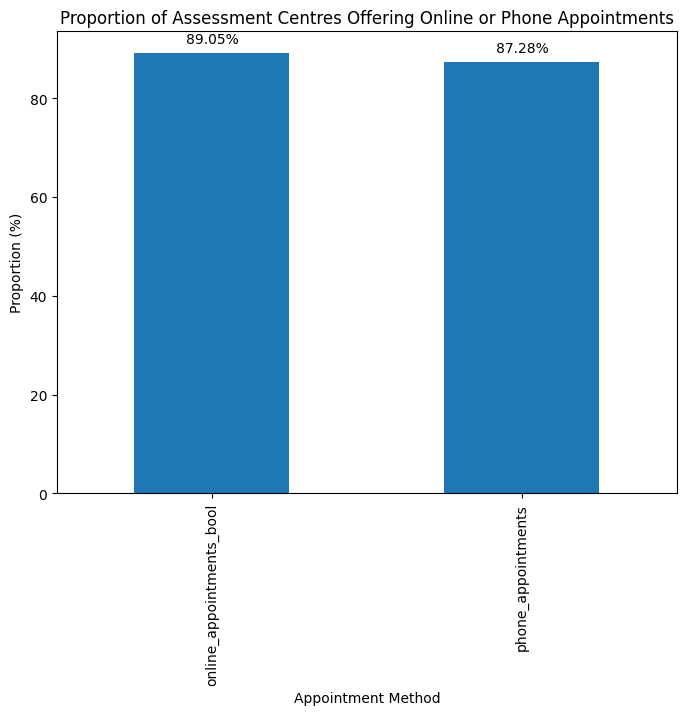

In [79]:
# Calculate the proportion (percentage) of centers offering online or phone appointments
appointment_methods = ['online_appointments_bool', 'phone_appointments']

# Calculate the proportion of non-null values for each appointment method
method_proportions = (data[appointment_methods].sum() / len(data)) * 100

# Plot the proportions
plt.figure(figsize=(8, 6))
ax = method_proportions.plot(kind='bar')
plt.title('Proportion of Assessment Centres Offering Online or Phone Appointments')
plt.xlabel('Appointment Method')
plt.ylabel('Proportion (%)')

# Add number labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### 3. Geographic Visualization

In [11]:
fig = px.scatter_geo(data, lat='latitude', lon='longitude', 
                     scope='north america',
                     title='Geographic Distribution of COVID-19 Assessment Centres in Ontario, Canada',
                     hover_name='location_name',  # Show location name on hover
                     color_discrete_sequence=['red'],  # Set marker color to red
                     center={'lat': 43.65107, 'lon': -79.347015},  # Center on Toronto
                    )

fig.update_geos(
    visible=False,  # Hide the default base map
    resolution=50, 
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(
    margin={"r":0,"t":30,"l":0,"b":0}, # Reduce margins for a closer view
    geo=dict(
        projection_scale=8 # Increase zoom level (adjust as needed)
    )
)

fig.show()